In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization
from keras.layers import Dropout
from keras.models import Model, load_model
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import keras.backend as K
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
data = pd.read_csv("dataset/cleandata.csv")

In [3]:
data.head(10)

,Name,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Ability
0,L. Messi,31,94,94,110.5,565,2202,0,5,4,4,4,4,188
1,Cristiano Ronaldo,33,94,94,77.0,405,2228,1,5,4,5,4,4,188
2,Neymar Jr,26,92,93,118.5,290,2143,1,5,5,5,3,4,185
3,De Gea,27,91,93,72.0,260,1471,1,4,3,1,2,1,184
4,K. De Bruyne,27,91,92,102.0,355,2281,1,4,5,4,4,3,183
5,E. Hazard,27,91,91,93.0,340,2142,1,4,4,4,3,4,182
6,L. Modrić,32,91,91,67.0,420,2280,1,4,4,4,4,3,182
7,L. Suárez,31,91,91,80.0,455,2346,1,5,4,3,3,4,182
8,Sergio Ramos,32,91,91,51.0,380,2201,1,4,3,3,3,2,182
9,J. Oblak,25,90,93,68.0,94,1331,1,3,3,1,2,1,183


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca26fcfb00>,
      dtype=object)

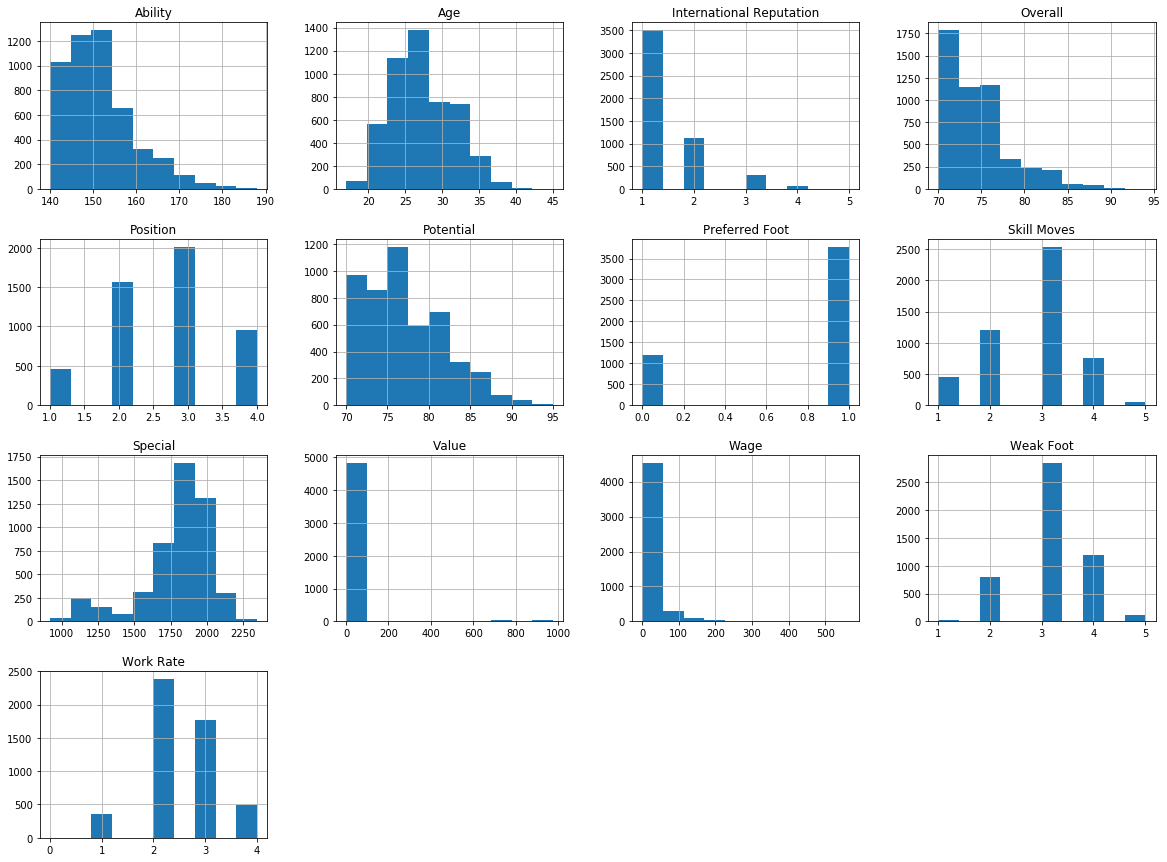

In [4]:
data.hist(figsize=(20,15))

In [5]:
data.describe()

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Ability
count,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000
mean,27.234375,74.597957,76.924679,28.013762,26.880208,1793.655248,0.758013,1.384615,3.113181,2.747596,2.478566,2.694912,151.522636
std,4.053039,3.735658,4.678133,121.954754,36.413794,243.437864,0.428329,0.659918,0.708176,0.854464,0.769550,0.881060,7.854995
min,17.000000,70.000000,70.000000,0.000000,0.000000,918.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,140.000000
25%,24.000000,72.000000,73.000000,2.900000,9.000000,1720.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,146.000000
50%,27.000000,74.000000,76.000000,4.900000,17.000000,1846.000000,1.000000,1.000000,3.000000,3.000000,2.000000,3.000000,150.000000
75%,30.000000,76.000000,80.000000,9.000000,31.000000,1948.000000,1.000000,2.000000,4.000000,3.000000,3.000000,3.000000,156.000000
max,45.000000,94.000000,95.000000,975.000000,565.000000,2346.000000,1.000000,5.000000,5.000000,5.000000,4.000000,4.000000,188.000000


In [6]:
arr = data.values
data = data.drop(labels=['Name','Overall','Potential'], axis=1)

In [7]:
data.head(5)

,Age,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Ability
0,31,110.5,565,2202,0,5,4,4,4,4,188
1,33,77.0,405,2228,1,5,4,5,4,4,188
2,26,118.5,290,2143,1,5,5,5,3,4,185
3,27,72.0,260,1471,1,4,3,1,2,1,184
4,27,102.0,355,2281,1,4,5,4,4,3,183


In [8]:
def split_train_test(data, test_ratio = 0.17):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
data = data.loc[:,['Age', 'Special','International Reputation','Skill Moves', 'Work Rate', 'Position', 'Ability','Value','Wage']]

In [10]:
train_set, test_set = split_train_test(data)

In [11]:
X_input = train_set.loc[:,['Age', 'Special','International Reputation','Skill Moves', 'Work Rate', 'Position', 'Ability']]
Y_input = train_set.loc[:,['Value','Wage']]

In [12]:
input_arr = X_input.values
output_arr = Y_input.values

In [13]:
print(input_arr.shape, output_arr.shape)

(4144, 7) (4144, 2)


In [14]:
def Netmodel(input_shape):
    X_input = Input(input_shape)
    X = BatchNormalization(axis = 1)(X_input)
    X = Dense(22,activation='relu', name = 'fc1')(X)
    X = Dense(11,activation='relu', name = 'fc2')(X)
    X = Dense(5,activation='relu', name = 'fc3')(X)
    X = Dense(2, activation='relu', name = 'fc4')(X)
    model = Model(inputs = X_input, outputs = X, name = 'NetModel')
    return model
    

In [33]:
netModel = Netmodel(input_arr.shape[1:])

In [34]:
netModel.compile(loss= 'mean_squared_error', optimizer='adam')

In [35]:
tbCallBack = TensorBoard(log_dir ='./logs', write_graph=True, write_images=True)
# ➜  ml tensorboard --logdir Graph/  in terminal to view board
history = netModel.fit(x=input_arr, y=output_arr, batch_size = 30, epochs = 500,verbose=2,callbacks=[tbCallBack])

Epoch 1/500
 - 0s - loss: 8840.3103
Epoch 2/500
 - 0s - loss: 7928.7610
Epoch 3/500
 - 0s - loss: 7570.5586
Epoch 4/500
 - 0s - loss: 7336.1227
Epoch 5/500
 - 0s - loss: 7153.7490
Epoch 6/500
 - 0s - loss: 6776.5004
Epoch 7/500
 - 0s - loss: 6453.3691
Epoch 8/500
 - 0s - loss: 6148.2797
Epoch 9/500
 - 0s - loss: 6102.8377
Epoch 10/500
 - 0s - loss: 5912.9032
Epoch 11/500
 - 0s - loss: 5691.4589
Epoch 12/500
 - 0s - loss: 5637.5706
Epoch 13/500
 - 0s - loss: 5566.3052
Epoch 14/500
 - 0s - loss: 5449.5903
Epoch 15/500
 - 0s - loss: 5574.8672
Epoch 16/500
 - 0s - loss: 5313.9490
Epoch 17/500
 - 0s - loss: 5216.9483
Epoch 18/500
 - 0s - loss: 5026.9443
Epoch 19/500
 - 0s - loss: 5048.3010
Epoch 20/500
 - 0s - loss: 5167.0014
Epoch 21/500
 - 0s - loss: 5227.4258
Epoch 22/500
 - 0s - loss: 5175.5566
Epoch 23/500
 - 0s - loss: 5133.2497
Epoch 24/500
 - 0s - loss: 4914.0438
Epoch 25/500
 - 0s - loss: 4974.4915
Epoch 26/500
 - 0s - loss: 5051.0473
Epoch 27/500
 - 0s - loss: 5051.6474
Epoch 28/5

Epoch 220/500
 - 0s - loss: 4901.0493
Epoch 221/500
 - 0s - loss: 4214.7988
Epoch 222/500
 - 0s - loss: 4313.3177
Epoch 223/500
 - 0s - loss: 4432.5508
Epoch 224/500
 - 0s - loss: 4639.7938
Epoch 225/500
 - 0s - loss: 4196.8141
Epoch 226/500
 - 0s - loss: 4359.9280
Epoch 227/500
 - 0s - loss: 4453.9265
Epoch 228/500
 - 0s - loss: 4538.2475
Epoch 229/500
 - 0s - loss: 4408.8221
Epoch 230/500
 - 0s - loss: 4208.0678
Epoch 231/500
 - 0s - loss: 4286.4395
Epoch 232/500
 - 0s - loss: 4494.3725
Epoch 233/500
 - 0s - loss: 4454.3314
Epoch 234/500
 - 0s - loss: 4427.3942
Epoch 235/500
 - 0s - loss: 4727.2480
Epoch 236/500
 - 0s - loss: 4704.5098
Epoch 237/500
 - 0s - loss: 4341.7201
Epoch 238/500
 - 0s - loss: 4478.6304
Epoch 239/500
 - 0s - loss: 4147.8462
Epoch 240/500
 - 0s - loss: 4575.9329
Epoch 241/500
 - 0s - loss: 4886.6604
Epoch 242/500
 - 0s - loss: 4743.9197
Epoch 243/500
 - 0s - loss: 4301.0284
Epoch 244/500
 - 0s - loss: 4548.6065
Epoch 245/500
 - 0s - loss: 4506.6232
Epoch 246/50

Epoch 436/500
 - 0s - loss: 4157.5581
Epoch 437/500
 - 0s - loss: 3901.0916
Epoch 438/500
 - 0s - loss: 4351.3806
Epoch 439/500
 - 0s - loss: 4448.3739
Epoch 440/500
 - 0s - loss: 4548.7489
Epoch 441/500
 - 0s - loss: 4528.7969
Epoch 442/500
 - 0s - loss: 4056.5139
Epoch 443/500
 - 0s - loss: 4218.3994
Epoch 444/500
 - 0s - loss: 4628.9572
Epoch 445/500
 - 0s - loss: 4096.0039
Epoch 446/500
 - 0s - loss: 4204.8886
Epoch 447/500
 - 0s - loss: 4135.8397
Epoch 448/500
 - 0s - loss: 4352.6767
Epoch 449/500
 - 0s - loss: 4284.9682
Epoch 450/500
 - 0s - loss: 4496.7947
Epoch 451/500
 - 0s - loss: 3987.0168
Epoch 452/500
 - 0s - loss: 4236.7332
Epoch 453/500
 - 0s - loss: 4282.7006
Epoch 454/500
 - 0s - loss: 4117.7526
Epoch 455/500
 - 0s - loss: 4590.3044
Epoch 456/500
 - 0s - loss: 4144.7293
Epoch 457/500
 - 0s - loss: 4466.9213
Epoch 458/500
 - 0s - loss: 3793.6081
Epoch 459/500
 - 0s - loss: 4304.7674
Epoch 460/500
 - 0s - loss: 4036.7371
Epoch 461/500
 - 0s - loss: 4172.6603
Epoch 462/50

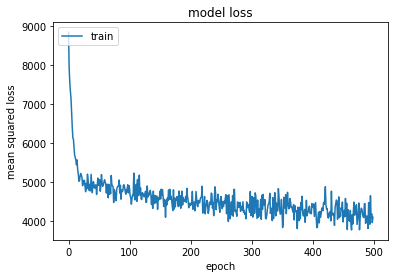

In [38]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('mean squared loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
X_test = test_set.loc[:,['Age', 'Special','International Reputation','Skill Moves', 'Work Rate', 'Position', 'Ability']]
Y_test = test_set.loc[:,['Value','Wage']]

In [40]:
preds = netModel.evaluate(x = X_test, y= Y_test)
print(preds)
# print ("Loss = " + str(preds))
# print ("Test Accuracy = " + str(preds[1]))

848/848 [==============================] - 0s 127us/step
3681.5581902557947


In [44]:
inp = input("Want to load model? [y/n]")
if(inp == 'y' or inp == 'Y'):
    netModel.load_weights("netmodel.h5")

Want to load model? [y/n]y


In [45]:
xx = list(map(int, input("Enter Age, Speciality, International Reputation, Skill Moves, Work Rate, Position, Ability").split()))

Enter Age, Speciality, International Reputation, Skill Moves, Work Rate, Position, Ability20 2500 5 5 5 5 190


In [46]:
xx = np.array([xx])
result = netModel.predict(xx)
print("Market Value = ",result[0][0])
print("Wage = ", result[0][1])

Market Value =  145.97319
Wage =  389.72083


In [43]:
inp = input("Want to save? [y/n]")
if(inp == 'y' or inp == 'Y'):
    netModel.save("netmodel.h5")

Want to save? [y/n]y


In [24]:
netModel.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7)                 28        
_________________________________________________________________
fc1 (Dense)                  (None, 22)                176       
_________________________________________________________________
fc2 (Dense)                  (None, 11)                253       
_________________________________________________________________
fc3 (Dense)                  (None, 5)                 60        
_________________________________________________________________
fc4 (Dense)                  (None, 2)                 12        
Total params: 529
Trainable params: 515
Non-trainable params: 14
_________________________________________________________________


dict_keys(['loss'])
